<a href="https://colab.research.google.com/github/Rainwoorimforest/pytorch-study/blob/main/src/assignment_woorim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1주차 과제

* The Country211 Dataset 불러와 Dataloader에 할당하기
* 불러온 The Country211 Dataset을 가지고 1~10 레이블에 해당하는 이미지로 분류하는 모델 학습하기
* 정확도, 손실.. 임계치만큼 도달해보기

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# Country211 데이터셋 로드 (훈련/테스트 데이터 구분 없음)
dataset = datasets.Country211(
    root="data",
    download=True,
    transform=ToTensor()
)

# train_dataset = datasets.Country211(
#     root="data",
#     # train=True,
#     download=True,
#     transform=ToTensor()
# )

# test_dataset = datasets.Country211(
#     root="data",
#     # train=False,
#     download=True,
#     transform=ToTensor()
# )

100%|██████████| 11.0G/11.0G [16:38<00:00, 11.0MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # 드라이브 연결

# data 폴더를 구글 드라이브에 저장
!cp -r data /content/drive/MyDrive/


Mounted at /content/drive
.
8495shin!
^C


In [ ]:
total_size = len(dataset)
print(f"Dataset size: {total_size}")  # 전체 데이터 개수 출력


Dataset size: 31650


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
# 각각의 데이터셋 로드
train_dataset = datasets.ImageFolder(root="data/country211/train", transform=transform)
valid_dataset = datasets.ImageFolder(root="data/country211/valid", transform=transform)
test_dataset = datasets.ImageFolder(root="data/country211/test", transform=transform)


In [ ]:
# 데이터 개수 출력
print(f"총 데이터 개수: {total_size}")
print(f"훈련 데이터 개수: {len(train_dataset)}")
print(f"검증 데이터 개수: {len(valid_dataset)}")
print(f"테스트 데이터 개수: {len(test_dataset)}")

총 데이터 개수: 31650
훈련 데이터 개수: 31650
검증 데이터 개수: 10550
테스트 데이터 개수: 21100


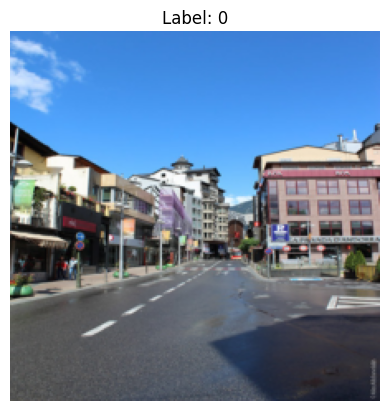

In [ ]:
import matplotlib.pyplot as plt

image_temp ,label_temp = train_dataset[5]

plt.imshow(image_temp.permute(1, 2, 0))  # (C, H, W) → (H, W, C) 변환 필요
plt.title(f"Label: {label_temp}")
plt.axis("off")
plt.show()

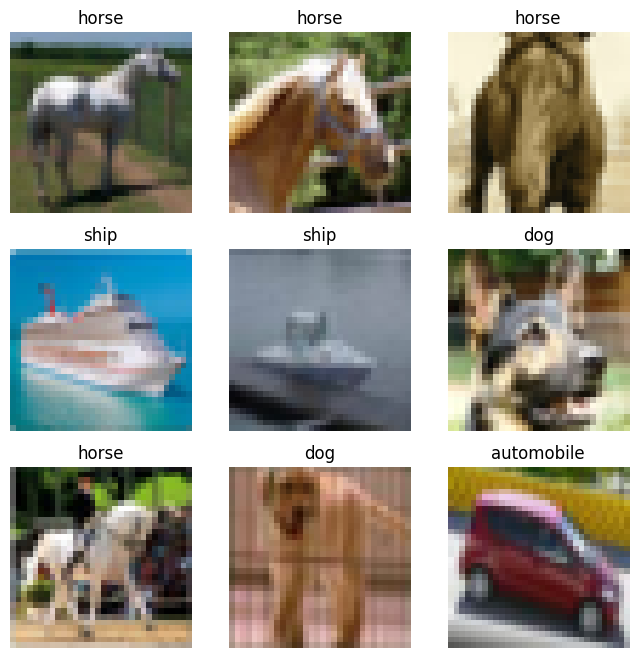

In [ ]:
# labels_map = {
#     0: "airplane",
#     1: "automobile",
#     2: "bird",
#     3: "cat",
#     4: "deer",
#     5: "dog",
#     6: "frog",
#     7: "horse",
#     8: "ship",
#     9: "truck",
# }
# figure = plt.figure(figsize=(8, 8))
# cols, rows = 3, 3
# for i in range(1, cols * rows + 1):
#     sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
#     img, label = train_dataset[sample_idx]
#     figure.add_subplot(rows, cols, i)
#     plt.title(labels_map[label])
#     plt.axis("off")
#     plt.imshow(img.permute(1, 2, 0))
# plt.show()

In [ ]:
BATCH_SIZE  = 32

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

# CustomDataset

torch.utils.data.Dataset은 데이터셋을 정의할 때 사용하는 PyTorch의 기본 클래스

우리가 직접 데이터셋 클래스를 만들 때, Dataset 클래스를 상속해서 __len__()과 __getitem__()을 구현해야 함

📌 이 클래스의 역할

annotations_file(CSV 파일)에 있는 이미지 경로 및 라벨을 로드

__len__() → 데이터셋의 전체 크기를 반환

__getitem__() → 특정 인덱스의 이미지와 레이블을 반환

📌 즉, 이 클래스는 모델이 학습할 데이터셋을 만들기 위한 클래스야.

In [ ]:
# import os
# import pandas as pd
# from torchvision.io import read_image

# class CustomDataset(Dataset):
#     def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = read_image(img_path)
#         label = self.img_labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


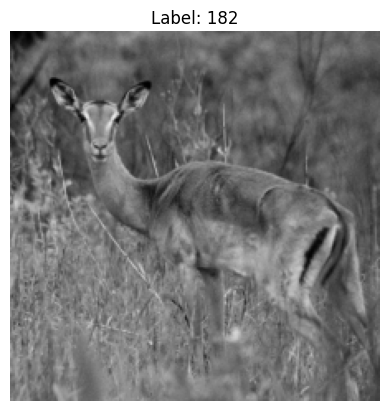

Label: 182


In [ ]:
# 이미지와 정답(label)을 표시. / 이미지 데이터셋 shape 파악 ([배치 크기, 채널수, 이미지 높이, 이미지 너비])
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].permute(1, 2, 0)
label = train_labels[0].item()

# 이미지 출력
plt.imshow(img)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

print(f"Label: {label}")

# 학습을 위한 장치 얻기

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
import torch.nn.functional as F

class CountryCNN(nn.Module):
    def __init__(self):
        super(CountryCNN, self).__init__()

        # 첫 번째 합성곱 층: 입력 (3, 224, 224) → 출력 (32, 112, 112)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling (2x2)

        # 두 번째 합성곱 층: 입력 (32, 112, 112) → 출력 (64, 56, 56)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)

        # 세 번째 합성곱 층: 입력 (64, 56, 56) → 출력 (128, 28, 28)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        # Fully Connected Layer (Flatten 이후)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)  # 완전연결층
        self.fc2 = nn.Linear(512, 211)  # 최종 출력층 (211개 국가 분류)

        # 드롭아웃 추가 (과적합 방지)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> MaxPooling
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> MaxPooling
        x = self.pool(F.relu(self.conv3(x)))  # Conv3 -> ReLU -> MaxPooling

        # Feature map을 1D로 펼치기 (Flatten)
        x = x.view(-1, 128 * 28 * 28)

        # 완전연결층 (FC Layer)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # 드롭아웃 추가
        x = self.fc2(x)  # 출력층

        return x

### 모델 매개변수

In [ ]:
learning_rate = 1e-3
# batch_size = 128
epochs = 50

In [ ]:
model = CountryCNN().to(device)

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: CountryCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=211, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


Layer: conv1.weight | Size: torch.Size([32, 3, 3, 3]) | Values : tensor([[[[-3.0044e-02, -1.7236e-02, -5.6747e-02],
          [-1.2830e-01, -5.6573e-02,  5.1263e-02],
          [-9.1617e-02,  5.9293e-02, -1.0682e-02]],

         [[-6.7085e-02, -9.7111e-03,  5.7858e-02],
          [-1.1257e-01,  6.4545e-02,  1.1377e-01],
          [ 1.0887e-02, -8.3501e-02,  4.8109e-03]],

         [[-6.5535e-02,  7.3779e-02, -1.0489e-01],
          [ 5.6926e-02,  5.5618e-04,  1.1001e-01],
    

In [ ]:
def model_train(dataloader, model, loss_function, optimizer):

    model.train()

    train_loss_sum = train_correct = train_total = 0

    total_train_batch = len(dataloader)
    print(len(dataloader))

    for images, labels in dataloader:

        x_train = images.to(device)
        y_train = labels.to(device)

        outputs = model(x_train)
        loss = loss_function(outputs, y_train)

        optimizer.zero_grad() # 이전 배치에서 계산된 기울기(gradient)를 초기화
        loss.backward() # 역전파 w 등 하이퍼파라미터 기울기 누적
        optimizer.step()

        train_loss_sum += loss.item()

        train_total += y_train.size(0)
        train_correct += ((torch.argmax(outputs, 1)==y_train)).sum().item()

    train_avg_loss = train_loss_sum / total_train_batch
    train_avg_accuracy = 100*train_correct / train_total

    return (train_avg_loss, train_avg_accuracy)

In [ ]:
def model_evaluate(dataloader, model, loss_function, optimizer):

    model.eval()

    with torch.no_grad():

        val_loss_sum = val_correct = val_total = 0

        total_val_batch = len(dataloader)

        for images, labels in dataloader:

            x_val = images.to(device)
            y_val = labels.to(device)

            outputs = model(x_val)
            loss = loss_function(outputs, y_val)

            val_loss_sum += loss.item()

            val_total += y_val.size(0)
            val_correct += ((torch.argmax(outputs, 1)==y_val)).sum().item()

        val_avg_loss = val_loss_sum / total_val_batch
        val_avg_accuracy = 100*val_correct / val_total

    return (val_avg_loss, val_avg_accuracy)

In [ ]:
def model_test(dataloader, model):

    model.eval()

    with torch.no_grad():

        test_loss_sum = test_correct = test_total = 0

        total_test_batch = len(dataloader)

        for images, labels in dataloader:

            x_test = images.to(device)
            y_test = labels.to(device)

            outputs = model(x_test)
            loss = loss_function(outputs, y_test)

            test_loss_sum += loss.item()

            test_total += y_test.size(0)
            test_correct += ((torch.argmax(outputs, 1)==y_test)).sum().item()

        test_avg_loss = test_loss_sum / total_test_batch
        test_avg_accuracy = 100*test_correct / test_total

        print('accuracy:', test_avg_accuracy)
        print('loss:', test_avg_loss)

* 여기 코드 다시 수정해야함 -> 만나서 스터디

In [ ]:
from datetime import datetime

train_loss_list = []
train_accuracy_list = []

val_loss_list = []
val_accuracy_list = []

start_time = datetime.now()

for t in range(epochs):
    #==============  model train  ================
    train_avg_loss, train_avg_accuracy = model_train(train_dataloader, model, loss_function, optimizer)

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    #=============================================

    #============  model evaluation  ==============
    val_avg_loss, val_avg_accuracy = model_evaluate(valid_dataloader, model, loss_function, optimizer)

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)
    #============  model evaluation  ==============

    print('epoch:', '%02d' % (t + 1),
          'train loss =', '{:.3f}'.format(train_avg_loss), 'train acc =', '{:.3f}'.format(train_avg_accuracy),
          'val loss =', '{:.3f}'.format(val_avg_loss), 'val acc =', '{:.3f}'.format(val_avg_accuracy))

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

990
epoch: 01 train loss = 5.356 train acc = 0.417 val loss = 5.352 val acc = 0.474
990
epoch: 02 train loss = 5.353 train acc = 0.316 val loss = 5.352 val acc = 0.474
990
epoch: 03 train loss = 5.353 train acc = 0.389 val loss = 5.352 val acc = 0.474
990
epoch: 04 train loss = 5.353 train acc = 0.398 val loss = 5.352 val acc = 0.474
990
epoch: 05 train loss = 5.353 train acc = 0.341 val loss = 5.352 val acc = 0.474
990


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(train_loss_list, label='train')
plt.plot(val_loss_list, label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(train_accuracy_list, label='train')
plt.plot(val_accuracy_list, label='validation')
plt.legend()

plt.show()